<div style="
  background: linear-gradient(90deg, yellow, brown);
  color: white;
  padding: 25px 30px;
  border-radius: 0; /* No rounded corners for full width */
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
  text-align: center;
  width: 100%;
  user-select: none;
  box-shadow: 0 5px 15px rgba(0,0,0,0.4);
">
  <h1 style="font-size: 2.8em; margin-bottom: 0.3em;">🚢 Titanic Survival Analysis</h1>
  <h3 style="font-weight: 600; font-size: 1.5em; margin-top: 0; letter-spacing: 0.05em;">
    A Data Analysis Project on Titanic Passenger Data
  </h3>

</div>


<span style="
    color: white;
    background: linear-gradient(90deg,brown, yellow);
    padding: 6px 12px;
    font-size: calc(16px + 0.4vw);
    border-radius: 8px;
    font-weight: bold;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.2);
">
🚢 Titanic Data Analysis Report 📊
</span>


In [13]:
#!pip install ydata_profiling
import pandas as pd
from ydata_profiling import ProfileReport

In [14]:
df=pd.read_csv(r"/content/train.csv")
profile=ProfileReport(df, progress_bar=False)

In [15]:
profile

100%|██████████| 12/12 [00:00<00:00, 43.80it/s]


In [16]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("Air_bnb.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 38.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="background: linear-gradient(90deg, brown, yellow); padding:14px 16px; border-radius:10px; color:white; font-family: Arial, sans-serif;">
  <h3 style="margin:0 0 8px 0; color:white;">📊 Titanic Dataset – Column Types </h3>
  <p style="margin:0;"><b>Numerical:</b> survived, age, sibsp, parch, fare</p>
  <p style="margin:4px 0 0 0;"><b>Categorical:</b> pclass, name, sex, ticket, cabin, embarked, title, Shared_Ticket, Ticket_Prefix, Cabin_Deck</p>
</div>


In [19]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<span style="
    color: white;
    background: linear-gradient(90deg, brown, yellow);
    padding: 6px 12px;
    font-size: calc(14px + 0.6vw);
    border-radius: 8px;
    font-weight: bold;
    display: inline-block;
">
🔍 Data Preprocessing
</span>


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
round(df.isnull().mean()*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [22]:
df.drop(['PassengerId'], axis=1, inplace=True)

In [23]:
df.dropna(subset=['Embarked'], inplace=True)

In [24]:
most_frequent_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_port, inplace=True)

/tmp/ipython-input-3846220348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_frequent_port, inplace=True)


In [25]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [26]:
df.isnull().sum().sum()

np.int64(177)

In [27]:
df.columns = df.columns.str.lower()

In [28]:
all(column == column.lower() for column in df.columns)

True

<span style="
    color: white;
    background: linear-gradient(90deg, brown, yellow);
    padding: 6px 12px;
    font-size: calc(14px + 0.6vw);
    border-radius: 8px;
    font-weight: bold;
    display: inline-block;
">
🔍 a Taitanic data exploration
</span>

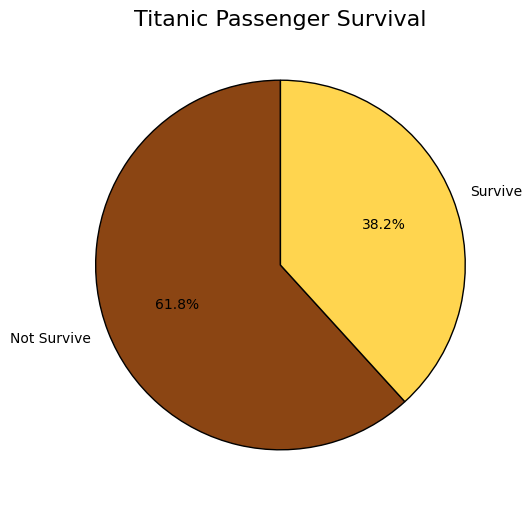

In [29]:
import matplotlib.pyplot as plt

# Count survival
survival_counts = df['survived'].value_counts()
labels = ['Not Survive', 'Survive']  # 0 → Not Survive, 1 → Survive

# Pie chart with colors (brown → yellow)
colors = ['#8B4513', '#FFD54F']

plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor':'black'})
plt.title('Titanic Passenger Survival', fontsize=16)
plt.show()


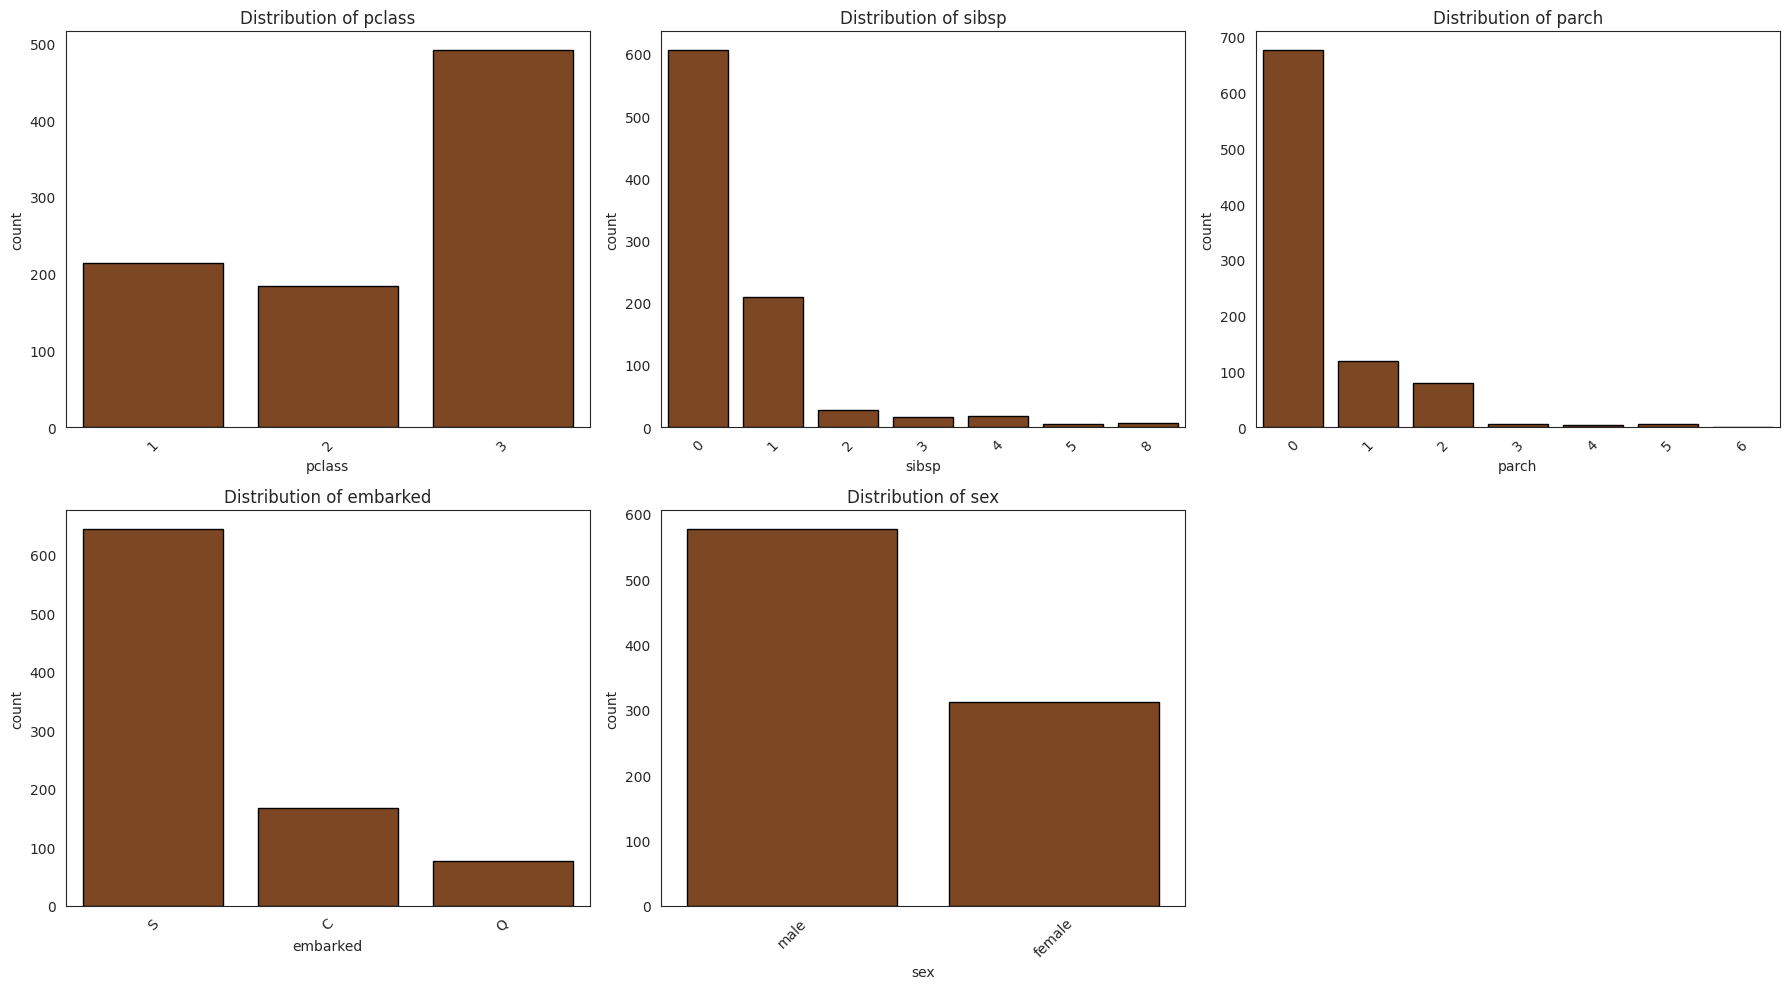

In [52]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['pclass', 'sibsp', 'parch', 'embarked', 'sex']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()


for i, col in enumerate(cols):
    sns.countplot(
        x=col, data=df,
        palette=['#8B4513'],
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot if any
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


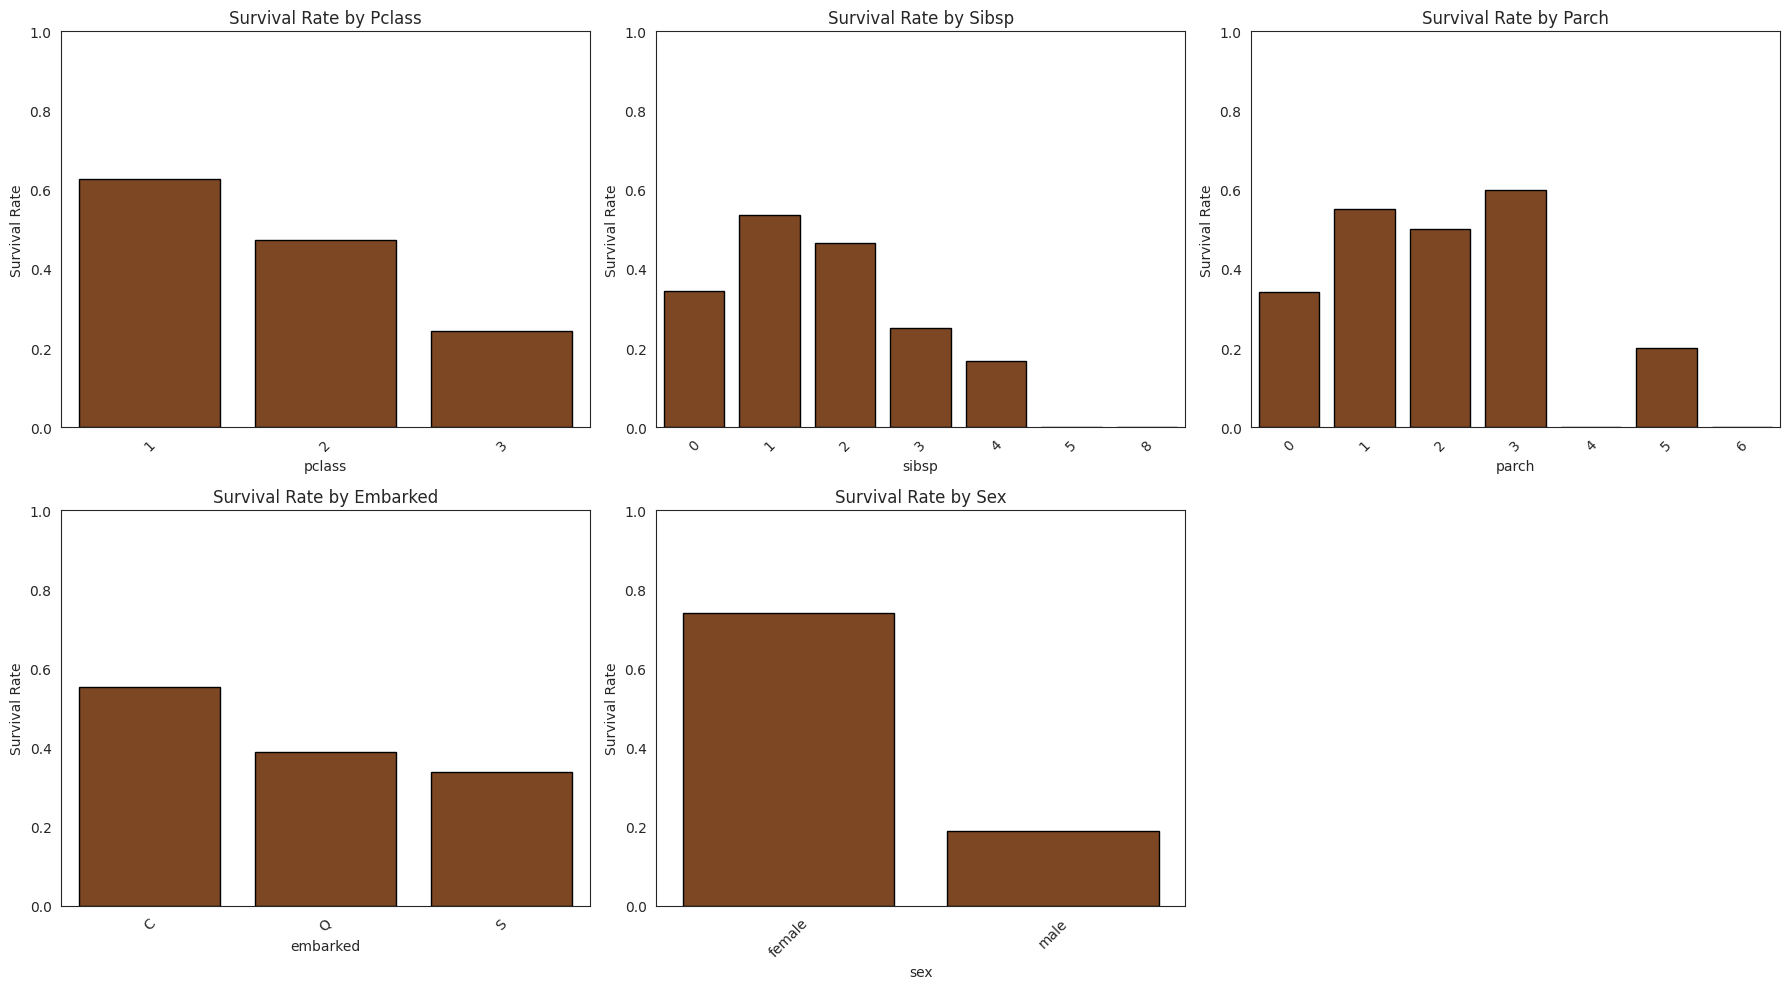

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

cols = ['pclass', 'sibsp', 'parch', 'embarked', 'sex']

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(cols):
    survival_rate = df.groupby(col)['survived'].mean().reset_index()
    sns.barplot(x=col, y='survived', data=survival_rate,
                palette=['#8B4513'], edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Survival Rate by {col.capitalize()}')
    axes[i].set_ylabel('Survival Rate')
    axes[i].set_ylim(0, 1)  # makes comparison easier
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot if any
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


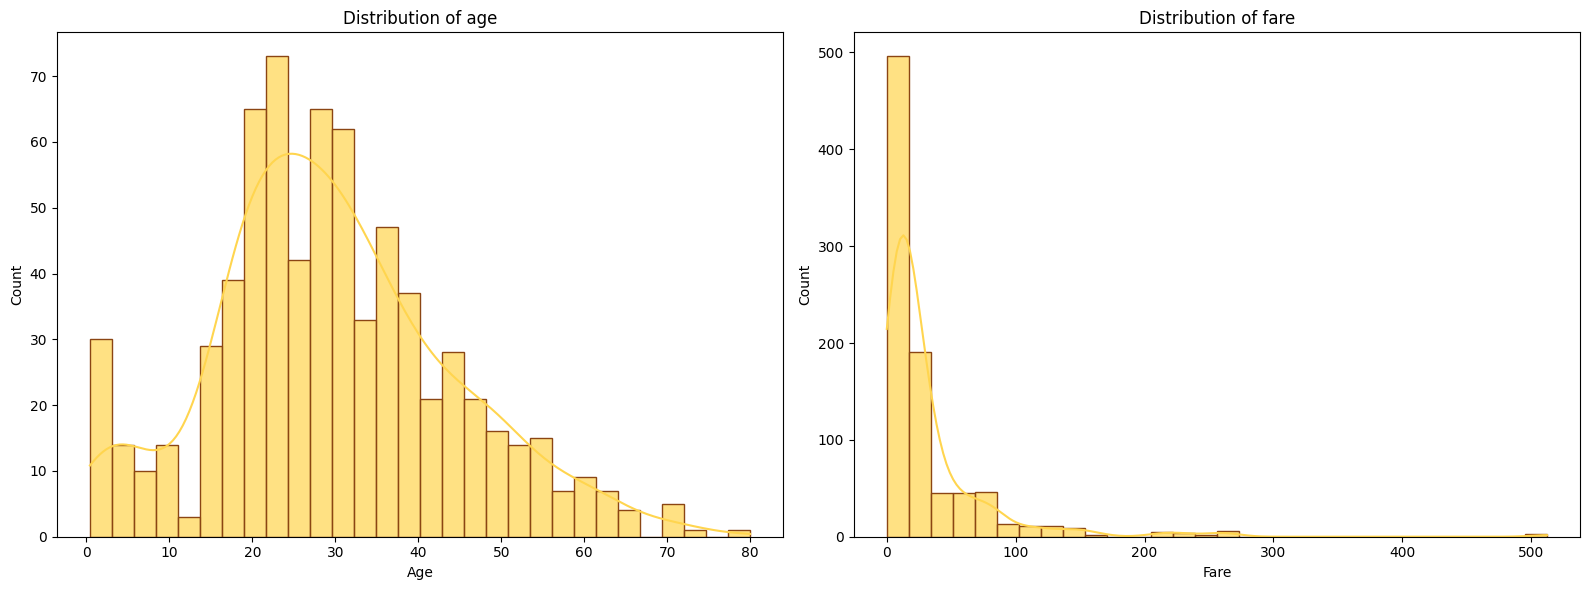

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

cols = ['age', 'fare']

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Custom brown-yellow gradient for bars
colors = ['#8B4513', '#FFD54F']

for i, col in enumerate(cols):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        color=colors[1],
        edgecolor='#8B4513',
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [34]:
df["title"] = df["name"].str.extract(r',\s*([^\.]+)\.')

In [35]:
print(df['title'].value_counts())

title
Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


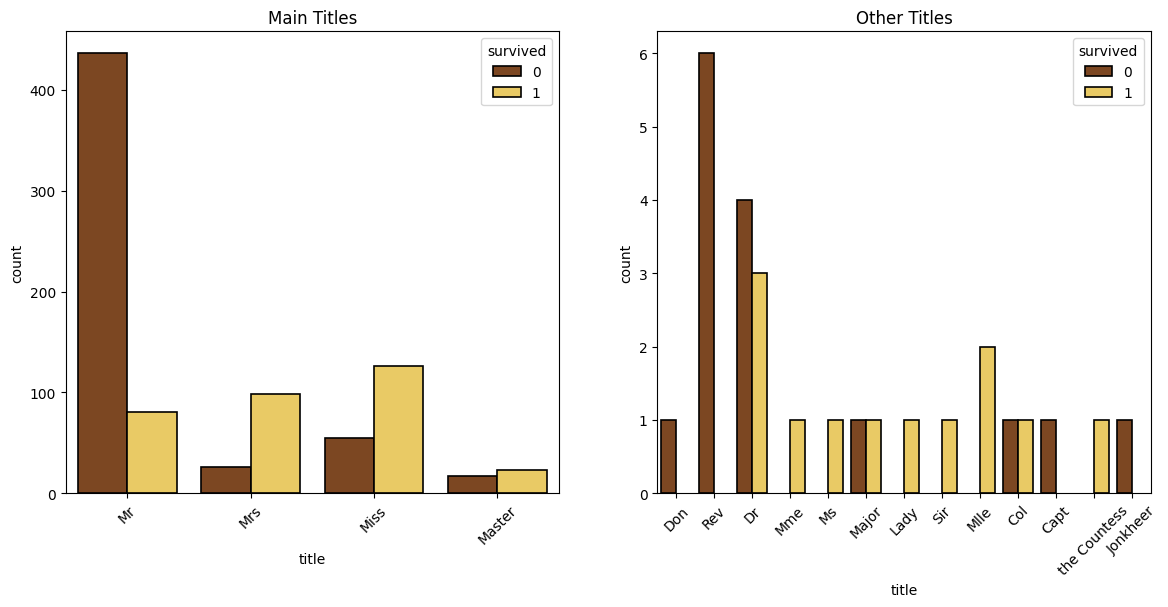

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Custom brown-yellow palette for Survived (0, 1)
brown_yellow_palette = ['#8B4513', '#FFD54F']  # Brown for 0, Yellow for 1

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Main Titles
sns.countplot(
    x='title', hue='survived',
    data=df[df['title'].isin(['Mr','Miss','Mrs','Master'])],
    palette=brown_yellow_palette,
    edgecolor='black', linewidth=1.2, ax=axes[0]
)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Main Titles')

# Other Titles
sns.countplot(
    x='title', hue='survived',
    data=df[~df['title'].isin(['Mr','Miss','Mrs','Master'])],
    palette=brown_yellow_palette,
    edgecolor='black', linewidth=1.2, ax=axes[1]
)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Other Titles')

plt.show()


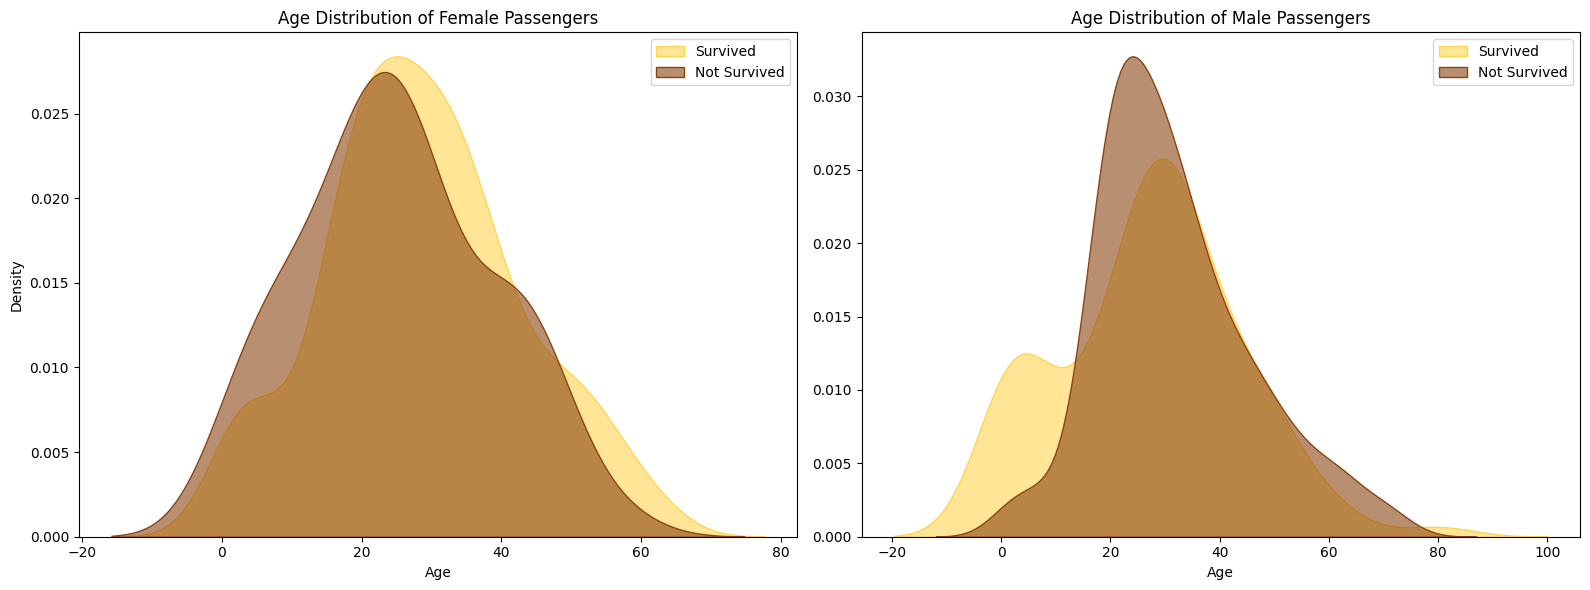

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Female passengers
sns.kdeplot(
    data=df.loc[(df['sex'] == 'female') & (df['survived'] == 1), 'age'],
    fill=True, label='Survived', color='#FFD54F', alpha=0.6, ax=axes[0]  # Yellow
)
sns.kdeplot(
    data=df.loc[(df['sex'] == 'female') & (df['survived'] == 0), 'age'],
    fill=True, label='Not Survived', color='#8B4513', alpha=0.6, ax=axes[0]  # Brown
)
axes[0].set_title('Age Distribution of Female Passengers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
axes[0].legend()

# Male passengers
sns.kdeplot(
    data=df.loc[(df['sex'] == 'male') & (df['survived'] == 1), 'age'],
    fill=True, label='Survived', color='#FFD54F', alpha=0.6, ax=axes[1]  # Yellow
)
sns.kdeplot(
    data=df.loc[(df['sex'] == 'male') & (df['survived'] == 0), 'age'],
    fill=True, label='Not Survived', color='#8B4513', alpha=0.6, ax=axes[1]  # Brown
)
axes[1].set_title('Age Distribution of Male Passengers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')
axes[1].legend()

plt.tight_layout()
plt.show()


<span style="
    background: linear-gradient(90deg,brown, yellow);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    padding: 8px 16px;
    font-size: calc(5px + 1vw);
    font-weight: 700;
    border-radius: 12px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    user-select: none;
    display: inline-block;
">
  👩‍👧‍👦 These results show that women and children were given priority to be saved first during the rescue.
</span>


pclass
1    58.6896
2    14.2500
3     8.0500
Name: fare, dtype: float64


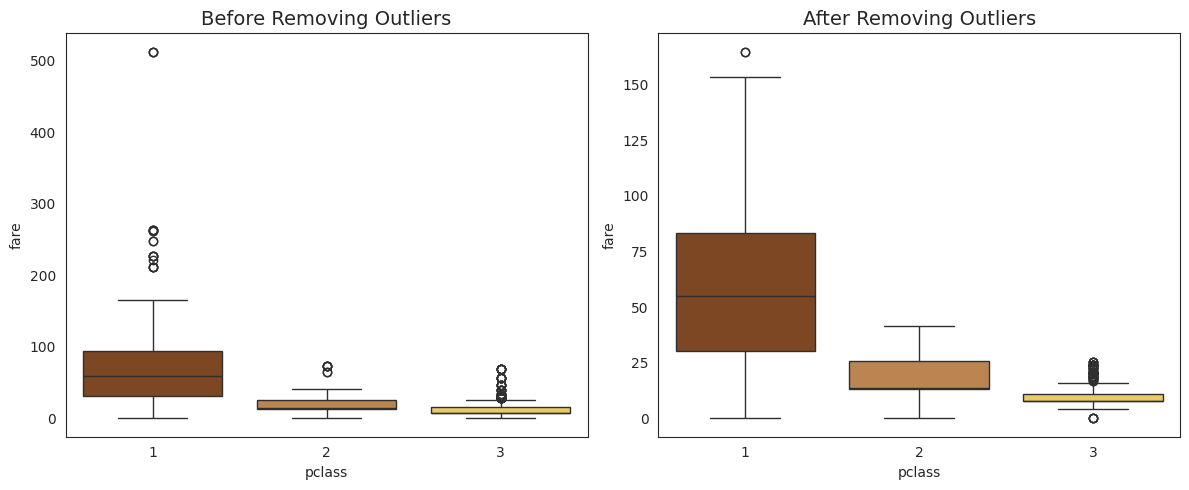

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Print median fares per class
print(df.groupby('pclass')['fare'].median())

sns.set_style("white")

# Custom brown-yellow palette
brown_yellow_palette = ['#8B4513', '#CD853F', '#FFD54F']  # Dark → light

plt.figure(figsize=(12,5))

# Before removing outliers
plt.subplot(1,2,1)
sns.boxplot(x='pclass', y='fare', data=df, hue='pclass', palette=brown_yellow_palette, dodge=False, legend=False)
plt.title('Before Removing Outliers', fontsize=14)

# Remove outliers by IQR method
df_filtered = pd.DataFrame()
for pclass in df['pclass'].unique():
    subset = df[df['pclass'] == pclass]
    Q1 = subset['fare'].quantile(0.25)
    Q3 = subset['fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_subset = subset[(subset['fare'] >= lower_bound) & (subset['fare'] <= upper_bound)]
    df_filtered = pd.concat([df_filtered, filtered_subset])

# After removing outliers
plt.subplot(1,2,2)
sns.boxplot(x='pclass', y='fare', data=df_filtered, hue='pclass', palette=brown_yellow_palette, dodge=False, legend=False)
plt.title('After Removing Outliers', fontsize=14)

plt.tight_layout()
plt.show()


<div style="
    background: linear-gradient(90deg, #FFD54F, #8B4513);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    padding: 8px 16px;
    font-size: calc(5px + 1vw);
    font-weight: 700;
    border-radius: 12px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    user-select: none;
    display: inline-block;
    margin-bottom: 8px;
">
  💰 Average fare decreases from pclass 1 to 3
</div>

<div style="
    background: linear-gradient(90deg, #FFD54F, #8B4513);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    padding: 8px 16px;
    font-size: calc(5px + 1vw);
    font-weight: 700;
    border-radius: 12px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    user-select: none;
    display: inline-block;
">
  🚢 Survival rate decreases in the same order
</div>


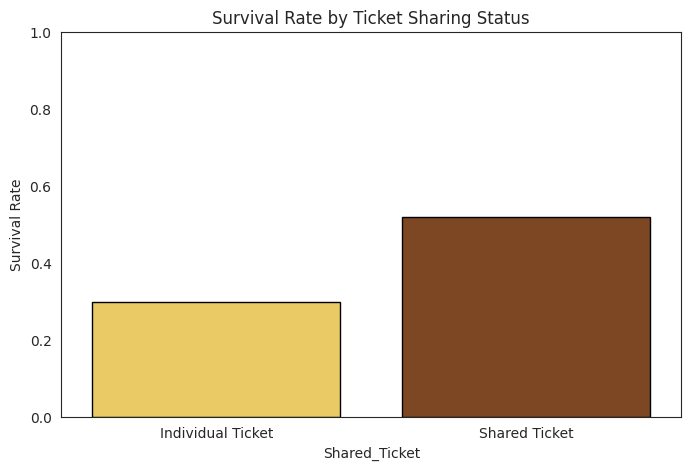

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Calculate shared tickets
ticket_counts = df['ticket'].value_counts()
df['Shared_Ticket'] = df['ticket'].map(lambda x: ticket_counts[x] > 1)

# Survival rate by ticket type
survival_by_ticket = df.groupby('Shared_Ticket')['survived'].mean().reset_index()
survival_by_ticket['Shared_Ticket'] = survival_by_ticket['Shared_Ticket'].map({
    True: 'Shared Ticket', False: 'Individual Ticket'
})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x='Shared_Ticket', y='survived', data=survival_by_ticket,
    palette=['#FFD54F', '#8B4513'],  # Yellow = Shared, Brown = Individual
    edgecolor='black'
)

plt.ylim(0,1)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Ticket Sharing Status')
plt.show()


<span style="
    color: white;
    background: linear-gradient(90deg, brown, yellow);
    padding: 6px 12px;
    font-size: calc(13px + 0.4vw);
    border-radius: 8px;
    font-weight: bold;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.2);
">
Survival Rate by Shared Ticket
</span>

- <span style="color:red; font-weight:bold;">**False (Not Shared):**</span> 29.8% survival rate  
- <span style="color:green; font-weight:bold;">**True (Shared):**</span> 51.8% survival rate  

Passengers with shared tickets had a notably higher survival rate compared to those with individual tickets.


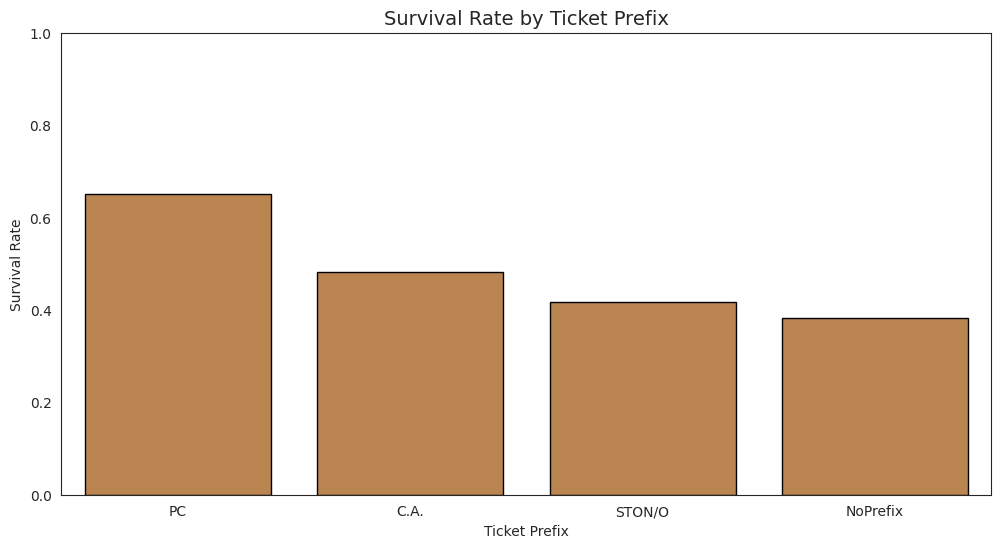

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Extract ticket prefix
df['Ticket_Prefix'] = df['ticket'].apply(lambda x: x.split()[0] if ' ' in x else 'NoPrefix')

# Keep only common prefixes
prefix_counts = df['Ticket_Prefix'].value_counts()
common_prefixes = prefix_counts[prefix_counts > 10].index

# Survival rate per prefix
survival_prefix = df[df['Ticket_Prefix'].isin(common_prefixes)].groupby('Ticket_Prefix')['survived'].mean().reset_index()
survival_prefix = survival_prefix.sort_values('survived', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=survival_prefix,
    x='Ticket_Prefix', y='survived',
    palette=['#CD853F'],  # Gradient yellow → brown
    edgecolor='black'
)
plt.title('Survival Rate by Ticket Prefix', fontsize=14)
plt.xlabel('Ticket Prefix')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


<span style="
    color: white;
    background: linear-gradient(90deg,brown,yellow);
    padding: 6px 12px;
    font-size: calc(13px + 0.4vw);
    border-radius: 8px;
    font-weight: bold;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.2);
">
Explanation of Survival Rates by Ticket Prefix
</span>

- <span style="color:blue; font-weight:bold;">**PC:**</span> This prefix is often linked to passengers in the highest social classes or first class. They had better access to lifeboats and rescue efforts, which explains their higher survival rate.

- <span style="color:green; font-weight:bold;">**CA:**</span> Passengers with this prefix might belong to a slightly lower social class than PC, but still generally had better conditions compared to others, resulting in a moderate survival rate.

- <span style="color:orange; font-weight:bold;">**STON/O:**</span> This prefix is usually associated with certain ticket agencies or locations. Passengers here were often from lower classes, which is reflected in their lower survival chances.

- <span style="color:red; font-weight:bold;">**NoPrefix:**</span> Passengers without any prefix tend to be from third class or lower socio-economic groups, typically facing the lowest survival rates due to limited access to safety resources.


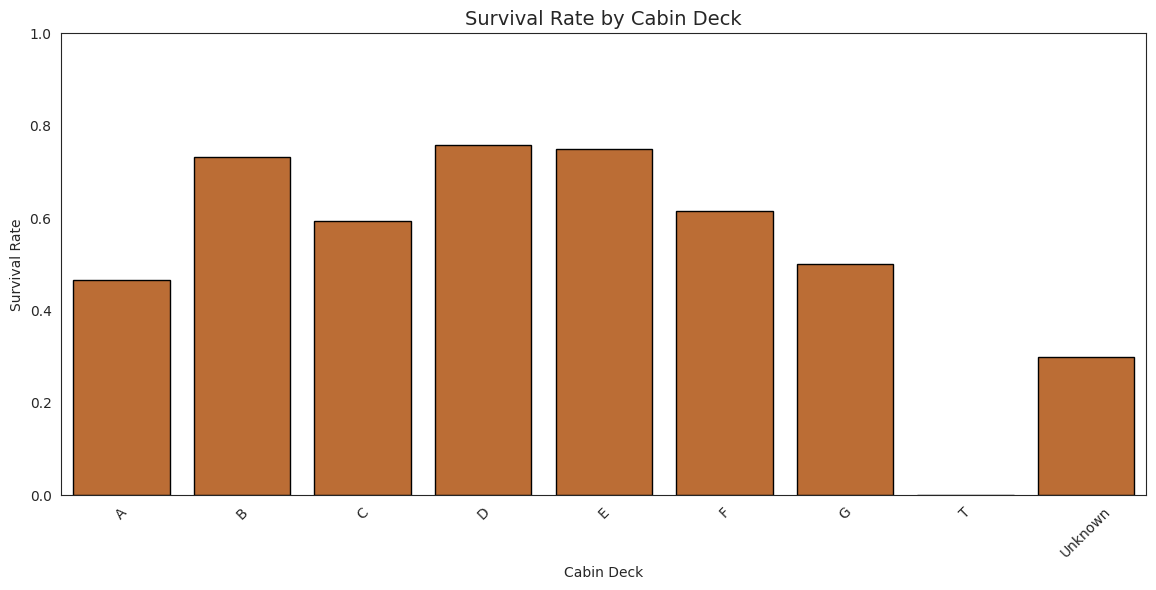

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Extract cabin deck
df['Cabin_Deck'] = df['cabin'].fillna('Unknown').apply(lambda x: x[0] if x != 'Unknown' else 'Unknown')

plt.figure(figsize=(14,6))
sns.barplot(
    x='Cabin_Deck', y='survived', data=df,
    palette=['#D2691E'],
    edgecolor='black',
    order=['A','B','C','D','E','F','G','T','Unknown'],
    errorbar=None
)
plt.title('Survival Rate by Cabin Deck', fontsize=14)
plt.xlabel('Cabin Deck')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.xticks(rotation=45)

plt.show()


- **<span style="color: #e76f51;">Passengers with assigned cabin numbers had a significantly higher survival rate (66%) compared to those without cabins (~30%).</span>**  
  This suggests that having a cabin, which often implies better accommodation or higher class, increased chances of survival.

- **<span style="color: #264653;">Survival rates varied by cabin deck:</span>**  
  - Decks **<span style="color: #f4a261;">D</span>**, **<span style="color: #f4a261;">E</span>**, and **<span style="color: #f4a261;">B</span>** showed the highest survival rates (around **73% to 76%**), indicating these areas may have been closer to lifeboats or had easier access to rescue.  
  - Decks like **<span style="color: #e76f51;">T</span>** and **<span style="color: #e76f51;">Unknown</span>** had the lowest survival rates, possibly representing lower-class passengers or less accessible locations.

- **<span style="color: #2a9d8f;">Overall, cabin presence and location were important factors influencing survival on the Titanic.</span>**


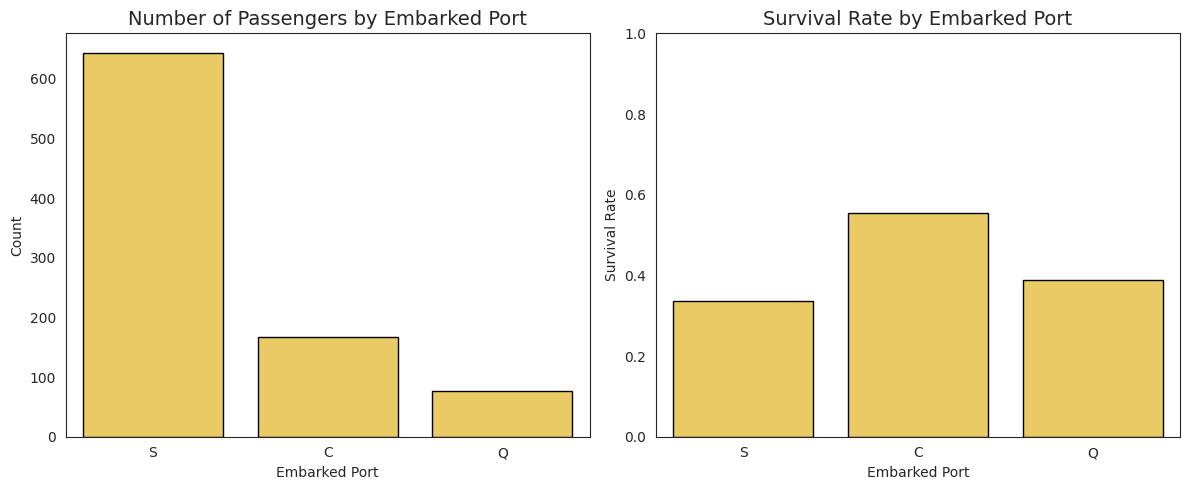

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,5))

# Passenger counts
plt.subplot(1, 2, 1)
sns.countplot(
    data=df,
    x='embarked',
    palette=['#FFD54F'],
    edgecolor='black'
)
plt.title('Number of Passengers by Embarked Port', fontsize=14)
plt.xlabel('Embarked Port')
plt.ylabel('Count')

# Survival rate
plt.subplot(1, 2, 2)
sns.barplot(
    data=df,
    x='embarked',
    y='survived',
    palette=yellow_brown_palette,
    edgecolor='black',
    errorbar=None
)
plt.title('Survival Rate by Embarked Port', fontsize=14)
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


<div style="
    background: linear-gradient(90deg, #FFD54F, #8B4513);
    padding: 18px 20px;
    border-radius: 10px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    color: #3E2723;
    max-width: 600px;
    line-height: 1.5;
    user-select: none;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.2);
">
  <p style="font-weight: 700; font-size: 17px; margin: 0;">
    The port where passengers boarded acted as an indirect indicator of social status, influencing their survival probabilities during the disaster.
  </p>
</div>


<div style=" background-color: #e0f7fa; padding: 16px; border-radius: 12px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #00796b; max-width: 600px; line-height: 1.5; user-select: none; font-weight: 600; "> 👪 Passengers with fewer family members aboard (siblings/spouses or parents/children) had higher survival rates.<br> ⚠️ Larger family groups experienced lower survival chances during the Titanic disaster. </div>

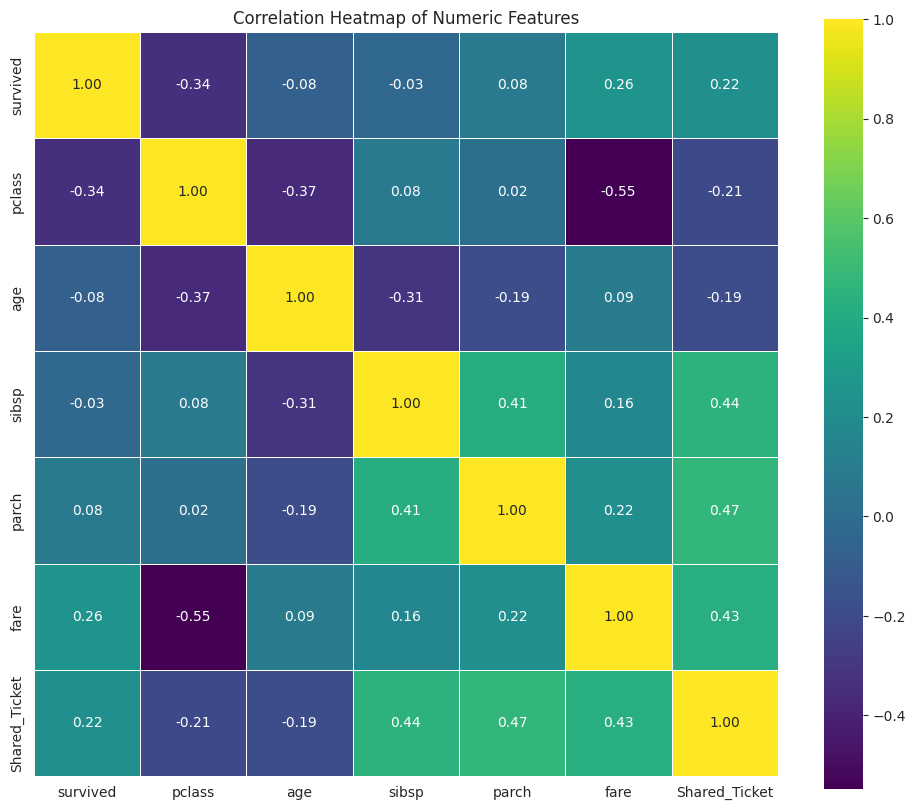

In [45]:
numeric_df = df.select_dtypes(exclude=['O'])
corr = numeric_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

<span style="
    color: white;
    background: linear-gradient(90deg,brown, yellow);
    padding: 6px 12px;
    font-size: calc(16px + 0.4vw);
    border-radius: 8px;
    font-weight: bold;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.2);
">
[Kaggle Titanic Dataset resource](https://www.kaggle.com/competitions/titanic/data)
</span>


<div style="
    background-color: #8B4513;  /* Dark brown background */
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    max-width: 1000px;
    margin: 40px auto;
    box-shadow: 0 5px 15px rgba(0,0,0,0.3);
">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeXZvdnNkcjQxOGw4c3Q5ejNyMHo4Y2Q4dW42dzBkeWd1OTl3Y2ZiYiZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/hU4AYZzEeyWnGMYsiW/giphy.gif"
       alt="Titanic sinking animation"
       style="width:300px; height:auto; margin-top:15px; border-radius:10px;">
</div>


# tasks

In [46]:
# impute missing embarked values with the most frequent port
most_frequent_port = df['embarked'].mode()[0]
df['embarked'].fillna(most_frequent_port, inplace=True)


In [47]:
# family_size = sibsp + parch + 1 (include passenger themselves)
df['family_size'] = df['sibsp'] + df['parch'] + 1

# explore survival rate by family_size
family_survival = df.groupby('family_size')['survived'].mean().sort_index()
print(family_survival)


family_size
1     0.300935
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64


In [48]:
# passengers alone have family_size = 1
alone = df[df['family_size'] == 1]
num_alone = alone.shape[0]
survival_rate_alone = alone['survived'].mean()

print(f"number of passengers alone: {num_alone}")
print(f"survival rate of passengers alone: {survival_rate_alone:.2f}")


number of passengers alone: 535
survival rate of passengers alone: 0.30
